# Naive Bayes (Bayes ingênuo, em português)

Antes de começarmos a discussão propriamente dita vamos estabelecer aqui algumas notações e hipóteses que iremos usar.

* $Y$ será nossa variável resposta / *label*;

* $x = (x_1, \cdots, x_d) $ será nosso conjunto de variáveis independentes / *features*;

* Vamos assumir também que nossas estimativas serão feitas com base em uma amostra de observações *independentes e identicamente distribuídas* (i.i.d.) $ (X_1, Y_1), \cdots, (X_n, Y_n) \sim (X, Y) $;

* $X_{i,j}$ será a j-ésima variável na i-ésima amostra, isto é, $X_i = (X_{i,1}, \cdots, X_{i,d})$, com $i=1,\cdots, n$.

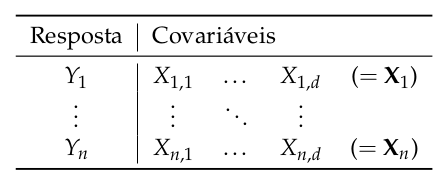

## 0. Introdução

Seja uma amostra com observações independentes como acima
$$ (X_1,Y_1), \cdots, (X_n,Y_n) \sim (X,Y) .$$

Queremos uma função $g(X): \mathbb{R}^d \to \mathbb{R}$ para prever nossas observações $(X_{n+1},Y_{n+1}), \cdots, (X_{n+m},Y_{n+m})$, ie, 
$$ g(X_{n+1}) ≈ y_{n+1}, \cdots, g({n+m}) ≈ y_{n+m} .$$

## 1. Função de Risco

Vamos assumir que $Y$ possui valores num conjunto $C$. É comum tomarmos nossa **função risco** como sendo a *probabilidade de erro em uma nova observação*:

$$ R(g) = E[\mathbb{I}(Y \neq g(x))] = P(Y \neq g(x)) \text{    (eq. 1)}. $$

Ou sejá, para o contexto de *classificação* uma **função de perda/custo** mais adequada é função 0-1

$$ L(g(x),Y) = \mathbb{I}(Y \neq g(x)) .$$

A melhor função de classificação $g$ segundo a equação 1 é dada então por

$$ g(x) = \arg \max_{d \in C} P(Y=d | x) \text{    (eq. 2)}.$$

A equação 2 acima é dita *classificador de Bayes* e é a função que minimiza a perda $R(g)$.

## 2. Classificadores Plug-in

De acordo com a abordagem anterior podemos seguir o seguinte caminho para lidar com nosso problema de predição.

1. Estimamos $P(Y=c | x)$ para cada categoria $c \in C$;

2. Tomamos então 

  $$ g(x) = \arg \max_{c \in C} \hat{P}(Y=c | x) .$$

Em particular, no caso binário, tomamos 

  $$ \hat{y} = g(x) = 1 ⇔ \hat{P}(Y=1 | x) > 1/2 \text{    (plug-in)}.$$

## 3. Naive Bayes (Bayes ingênuo)

Vamos assumir que $x$ seja um vetor aleatório contínuo, então pelo Teorema de Bayes sabemos que 

$$ P(Y=c | x) = \dfrac{f(x|Y=c)P(Y=c)}{\sum_{s \in C}f(x|Y=s)P(Y=s)} .$$

Podemos estimar o termo $P(Y=s)$ usando as proporções amostrais de cada classe. 

Para estimarmos $f(x|Y=s)$ é necessário assumirmos algum modelos para as variáveis. O método de **Naive Bayes** assume que, para todo $s \in C$, $f(x|Y=s)$ pode ser fatorada como 

$$ f(x|Y=s) = f((x_1, \cdots, x_d) | Y = s) = \prod_{j=1}^d f(x_j|Y=s),$$

ie, assume que cada componente de $x$ é condicionalmente independente à classe $Y$.

Podemos estimar cada $f(x_j|Y=s)$ assumindo, por exemplo, que 

$$ x_j | Y = s ∼ N(\mu_{j,s},\sigma_{j,s}^2), j = 1, \cdots, d.$$

Isto é, assumimos que cada componente do vetor $x$ tem distribuição normal com parâmetros que dependem da classe e da componente em questão.

Podemos estimar os parâmetros da distribuição normal deste modelo, por exemplo, via estimação de *máxima verossimilhança*:

$$ \hat{\mu}_{j,s}=(1/|C_s|)\sum_{k\in C_s}X_{j,k}, \\
\hat{\sigma}_{j,s}^2=(1/|C_s|)\sum_{k\in C_s}(X_{j,k}-\hat{\mu}_{j,s})^2,$$

onde $C_s=\{j:Y_j=s\}$ é o conjunto de todas as observações de treinamento da classe $s$.

Neste caso o estimador para a densidade condicional $f(x|Y=c)$ é dado por

$$ f(x|Y=c) = \prod_{j=1}^d f(x_j|Y=c) \\
= \prod_{j=1}^d \dfrac{1}{\sqrt{2\pi \hat{\sigma}_{j,c}^2}}\exp{(-(x_j-\hat{\mu}_{j,c})^2/2\hat{\sigma}_{j,c}^2)}. $$

**OBS.:** Poderíamos ter tomado outras distribuições e outros métodos de estimação.

## 4. Naive Bayes com Scikit-Learn

In [1]:
# Carregando o dataset Iris
from sklearn.datasets import load_iris

# Carregando a divisão para treino e teste
from sklearn.model_selection import train_test_split

# Carregando o Naive Bayes com o modelo Gaussiano e estimador via Máxima Verossimilhança
from sklearn.naive_bayes import GaussianNB

# Instanciando os dados
X, y = load_iris(return_X_y=True)

# Conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Instanciando o modelo 
gnb = GaussianNB()

# Treinando e prevendo o modelo
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Número de pontos rotulados incorretamente de um total de %d pontos : %d"
  % (X_test.shape[0], (y_test != y_pred).sum()))

Número de pontos rotulados incorretamente de um total de 75 pontos : 4


## Referências

* Aprendizado de máquina Uma abordagem estatística. 1a edição (2020) - Rafael Izbicki e Tiago Mendonça dos Santos;

* https://medium.com/turing-talks/turing-talks-16-modelo-de-predição-naive-bayes-6a3e744e7986;

* https://scikit-learn.org/stable/modules/naive_bayes.html.
